# 데이터 전처리

In [1]:
import pandas as pd

In [2]:
perform_df = pd.read_json('datas/raw_data/raw_perform.json')
rating_df = pd.read_json('datas/raw_data/raw_rating.json')

In [27]:
# Datetime으로 변환
from datetime import datetime
perform_df['방송일시'] = list(map(lambda i : datetime.fromtimestamp(i/1000), perform_df['방송일시']))

In [31]:
perform_df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 15:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 15:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 15:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 15:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 15:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38304,2020-01-01 09:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,None
38305,2020-01-01 09:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,None
38306,2020-01-01 10:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,None
38307,2020-01-01 10:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,None


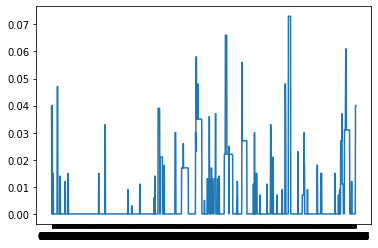

In [34]:
import matplotlib.pyplot as plt
plt.plot(rating_df.set_index('시간대').sort_index()['2019-01-02'])
plt.title('시간대별 시청률 변화')
plt.rcParams['font.family'] = 'NanumGothic'

## 상관분석 (실적 / 평균 시청률)
고려사항 1. 같은 마더코드를 공유하는 제품끼리 계산하여 -1~1사이의 값으로 변경

In [49]:
# 취급액 int형식으로 변경
perform_df[' 취급액 '] = list(map(lambda i : int(i.replace(',','')) if i != None else None, perform_df[' 취급액 ']))

In [56]:
import copy
avg_item = copy.deepcopy(perform_df.groupby('마더코드').mean())[['노출(분)',' 취급액 ']]

In [57]:
avg_item

,노출(분),취급액
마더코드,,
100000,19.166667,1.276033e+07
100001,30.000000,3.783400e+07
100002,20.000000,3.808313e+07
100006,10.000000,1.011230e+07
100009,20.000000,3.074067e+07
...,...,...
100844,19.939759,3.715889e+07
100845,22.105263,5.365816e+06
100846,20.000000,1.328808e+07


In [61]:
perform_df.set_index('마더코드', inplace=True)
perform_df['실적평균'] = avg_item[' 취급액 ' ]

In [63]:
perform_df['실적비율'] = perform_df[' 취급액 '] / perform_df['실적평균']

In [66]:
perform_df

,방송일시,노출(분),상품코드,상품명,상품군,판매단가,취급액,실적평균,실적비율
마더코드,,,,,,,,,
100346,2019-01-01 15:00:00,20,201072,테이트 남성 셀린니트3종,의류,"39,900",2099000.0,1.016841e+07,0.206424
100346,2019-01-01 15:00:00,20,201079,테이트 여성 셀린니트3종,의류,"39,900",4371000.0,1.016841e+07,0.429861
100346,2019-01-01 15:20:00,20,201072,테이트 남성 셀린니트3종,의류,"39,900",3262000.0,1.016841e+07,0.320797
100346,2019-01-01 15:20:00,20,201079,테이트 여성 셀린니트3종,의류,"39,900",6955000.0,1.016841e+07,0.683981
100346,2019-01-01 15:40:00,20,201072,테이트 남성 셀린니트3종,의류,"39,900",6672000.0,1.016841e+07,0.656150
...,...,...,...,...,...,...,...,...,...
100073,2020-01-01 09:20:00,20,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,NaN,NaN
100073,2020-01-01 09:40:00,20,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,NaN,NaN
100073,2020-01-01 10:00:00,20,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,NaN,NaN


In [67]:
# 평균 시청률
# 날짜 먼저 탐색 후 해당하는 시간대 평균 시청률 계산

In [85]:
rating_df.set_index('시간대', inplace = True)

In [144]:
rating_df.sort_index()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
00:00,0.0,0.040,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
00:01,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
00:02,0.0,0.023,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
00:03,0.0,0.040,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
00:04,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.018,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:55,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.036,0.000,0.0,0.0,0.0,0.024
23:56,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.036,0.000,0.0,0.0,0.0,0.024
23:57,0.0,0.040,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.050,0.000,0.0,0.0,0.0,0.024


In [120]:
perform_df['방송날짜'] = list(map(lambda i : i.date(), perform_df['방송일시']))

In [124]:
import datetime
perform_df = perform_df[perform_df['방송날짜'] <= datetime.date(2019,12,31)]

In [101]:
rating_df[str(perform_df.iloc[0]['방송일시'])[:10]][str(perform_df.iloc[0]['방송일시'])[11:16]:str(perform_df.iloc[0]['방송일시'] + timedelta(minutes = int(perform_df.iloc[0]['노출(분)'])))[11:16]].mean()

0.008714285714285716

In [125]:
perform_df['평균시청률'] = list(map(lambda i : rating_df[str(i['방송일시'])[:10]][str(i['방송일시'])[11:16]:str(i['방송일시'] + timedelta(minutes = int(i['노출(분)'])))[11:16]].mean(), perform_df.iloc))

In [99]:
perform_df.iloc[0]['방송일시'] + timedelta(minutes = int(perform_df.iloc[0]['노출(분)']))

Timestamp('2019-01-01 15:20:00')

In [95]:
perform_df.iloc[0]['방송일시'] - perform_df.iloc[1]['방송일시']

Timedelta('0 days 00:00:00')

In [98]:
timedelta(minutes = 1)

datetime.timedelta(seconds=60)

In [149]:
perform_df[perform_df['평균시청률']!=0].dropna()['norm실적'].corr(perform_df[perform_df['평균시청률']!=0].dropna()['평균시청률'], method='pearson')

-0.013194143396904749

In [150]:
perform_df[perform_df['상품군'] == '의류'].dropna()['norm실적'].corr(perform_df[perform_df['상품군'] == '의류'].dropna()['평균시청률'], method='pearson')

0.02057105472832569

In [147]:
from sklearn import preprocessing
x = perform_df['실적비율'].values.reshape(-1,1)
scaler = preprocessing.MaxAbsScaler()
x_scaled = scaler.fit_transform(x)
perform_df['norm실적'] = x_scaled

In [155]:
perform_df.corr()

,노출(분),상품코드,취급액,실적평균,실적비율,평균시청률,norm실적
노출(분),1.000000,0.081625,0.028063,0.007350,0.018855,0.007857,0.018855
상품코드,0.081625,1.000000,-0.015572,-0.022656,-0.000604,0.003778,-0.000604
취급액,0.028063,-0.015572,1.000000,0.691273,0.599355,0.007075,0.599355
실적평균,0.007350,-0.022656,0.691273,1.000000,0.000358,0.019220,0.000358
실적비율,0.018855,-0.000604,0.599355,0.000358,1.000000,-0.007275,1.000000
평균시청률,0.007857,0.003778,0.007075,0.019220,-0.007275,1.000000,-0.007275
norm실적,0.018855,-0.000604,0.599355,0.000358,1.000000,-0.007275,1.000000
